Text(0, 0.5, '$f(x)$')

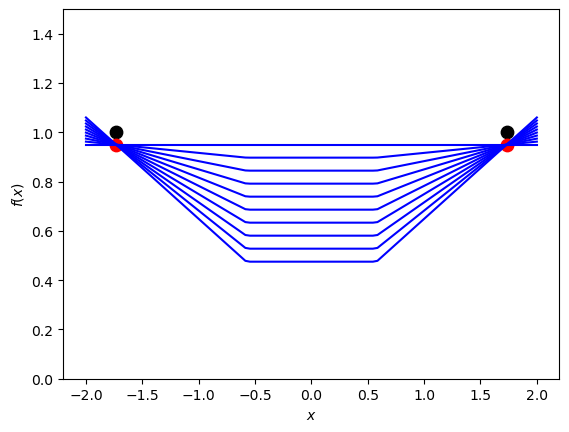

In [1]:
import numpy as np
import matplotlib.pyplot as plt

beta = 1e-1

def relu(x):
    return (x + np.abs(x))/2
def min_norm_interp(x, t, beta):
    return (np.sqrt(t) * relu(np.sqrt(3*t)/2*x + np.sqrt(t)/2) + np.sqrt(t) * relu(-np.sqrt(3*t)/2*x + np.sqrt(t)/2) + 1-2*t)*(1 - beta/2)

x = np.linspace(-2, 2, 100)
t = np.linspace(0, 0.5, 10)

for ts in t: 
    plt.plot(x, min_norm_interp(x,ts,beta), color = 'blue')
plt.scatter(np.sqrt(3), 1, color = 'black', s = 80)
plt.scatter(-np.sqrt(3), 1, color = 'black', s = 80)
plt.scatter(np.sqrt(3), 1 - beta/2, color = 'red', s = 80)
plt.scatter(-np.sqrt(3), 1 - beta/2, color = 'red', s = 80)
plt.ylim(0,1.5)
plt.xlabel("$x$")
plt.ylabel("$f(x)$")

Text(0, 0.5, '$f(x)$')

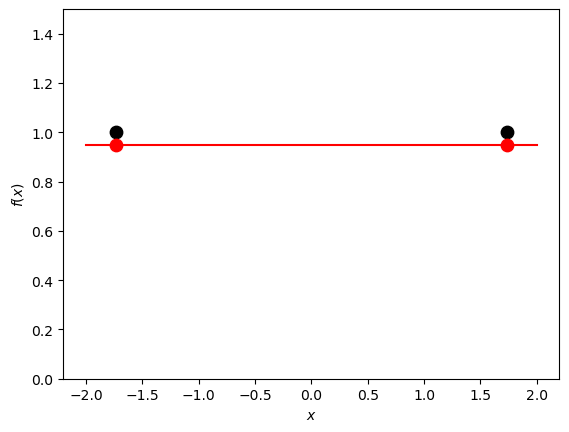

In [2]:
plt.plot(x, min_norm_interp(x,0, beta), color = 'red')
plt.scatter(np.sqrt(3), 1, color = 'black', s = 80)
plt.scatter(-np.sqrt(3), 1, color = 'black', s = 80)
plt.scatter(np.sqrt(3), 1 - beta/2, color = 'red', s = 80)
plt.scatter(-np.sqrt(3), 1 - beta/2, color = 'red', s = 80)
plt.ylim(0,1.5)
plt.xlabel("$x$")
plt.ylabel("$f(x)$")

Text(0, 0.5, '$f(x)$')

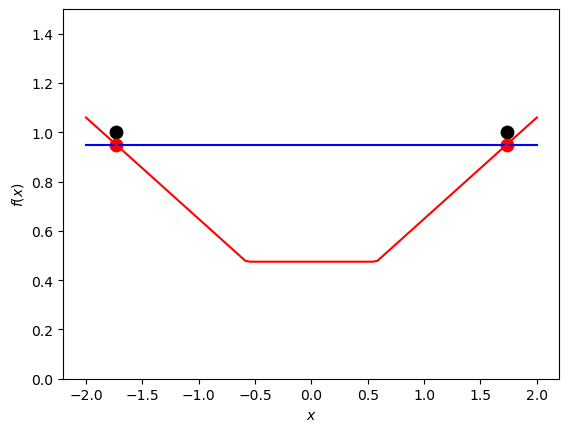

In [3]:
plt.plot(x, min_norm_interp(x,0,beta), color = 'blue')
plt.plot(x, min_norm_interp(x,0.5,beta), color = 'red')
plt.scatter(np.sqrt(3), 1, color = 'black', s = 80)
plt.scatter(-np.sqrt(3), 1, color = 'black', s = 80)
plt.scatter(np.sqrt(3), 1-beta/2, color = 'red', s = 80)
plt.scatter(-np.sqrt(3), 1-beta/2, color = 'red', s = 80)
plt.ylim(0,1.5)
plt.xlabel("$x$")
plt.ylabel("$f(x)$")

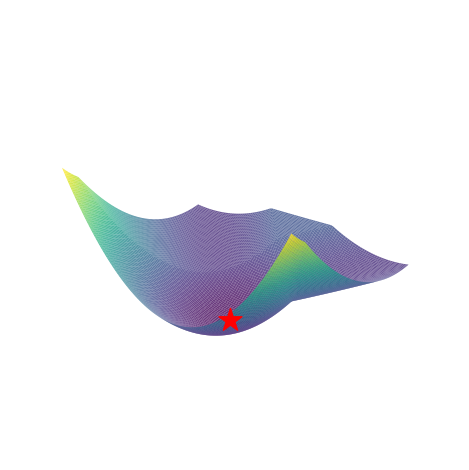

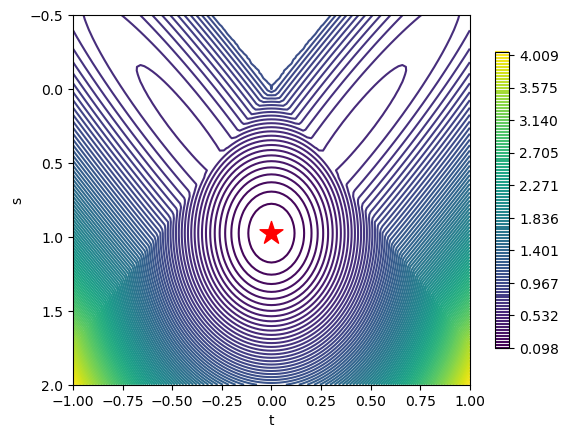

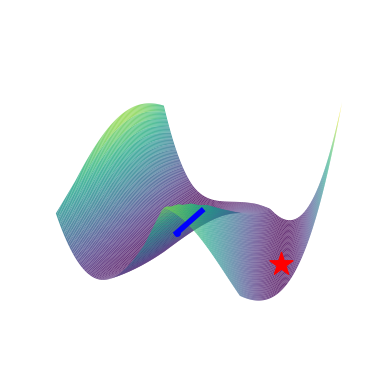

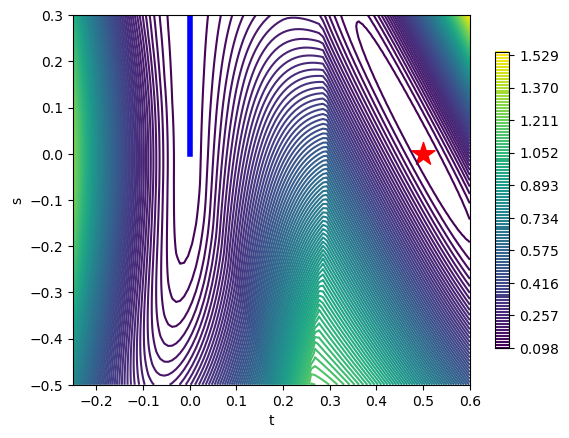

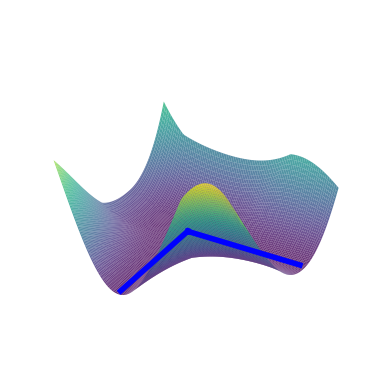

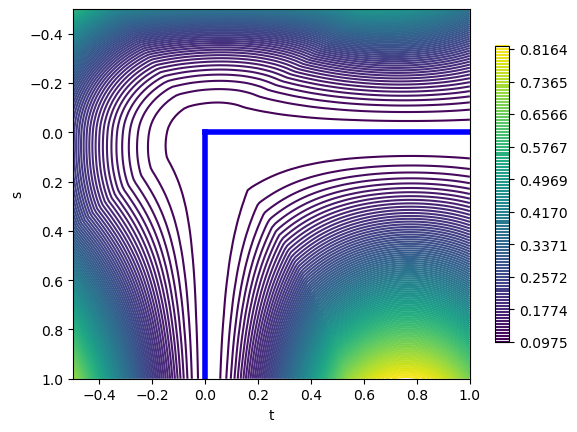

In [4]:
from matplotlib.colors import LightSource
from matplotlib import cm
import cvxpy as cp

def relu(x):
    return np.maximum(0,x)
def drelu(x):
    return x>=0

def loss_function(X, y, U, v):

    ## X: R^{n x d}, y: R^n, U:R^{d x m}, v:R^m
    ## What it does: 
    # 
    # First, calculate (XU)_{+}
    # Second, find the optimal second layer weights by solving a convex problem
     
    d = np.shape(X)[1]
    m = np.shape(U)[1]
    return 0.5*np.linalg.norm(relu(X@U)@v - y)**2 + 0.5*beta*np.linalg.norm(v)**2 + 0.5*beta*np.linalg.norm(U)**2

#########

X = np.array([[-np.sqrt(3), 1],[np.sqrt(3), 1]])
y = np.array([1,1])
opt = beta - beta*beta/4

################ Plotting when m = 1 ############################

np.random.seed(0)

mint = -1
maxt = 1
mins = -0.5
maxs = 2
tval = np.linspace(mint, maxt, 101)
sval = np.linspace(maxs, mins, 101)
Xm, Ym = np.meshgrid(tval, sval)
Val = np.zeros((101, 101))
for (i,t) in enumerate(tval):
    for (j,s) in enumerate(sval):
        Val[j,i] = loss_function(X, y, np.array([[t],[s]]), np.array([np.sqrt(1 - 0.5*beta)]))


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d', computed_zorder = False)
ax.plot_surface(Xm, Ym, Val, cmap = cm.viridis, alpha = 0.8, rcount=200, ccount=200)
ax.set_xlabel('t')
ax.set_ylabel('s')
ax.set_ylim(maxs, mins, auto = True)
ax.set_zlabel('V')
ax.scatter(0, np.sqrt(1-0.5*beta), opt,  color = 'red', marker = '*', s = 300)
plt.axis('off')
plt.grid(False)
plt.tight_layout()
plt.show()
plt.savefig("m = 1_landscape_noaxis.png",bbox_inches='tight')

max_level = np.max(Val)
min_level = opt
step_level = (max_level - min_level)/100
CS = plt.contour(Xm, Ym, Val, levels = np.arange(min_level, max_level + step_level, step_level))
CB = plt.colorbar(CS, shrink=0.8, extend='both')


plt.scatter(0, np.sqrt(1-0.5*beta), color = 'red', marker = '*', s = 300)
plt.xlabel('t')
plt.ylabel('s')
plt.ylim(maxs, mins)
plt.show()

############### Plotting when m = 2 ##########################3##

k1 = np.sqrt(3)/2/np.sqrt(2)*np.sqrt(1-0.5*beta)
k2 = 1/2/np.sqrt(2)*np.sqrt(1-0.5*beta)
mint = -0.25
maxt = 0.6
mins = -0.5
maxs = 0.3

U0 = np.array([[0, 0],[np.sqrt(1-0.5*beta), 0]])
v0 = np.array([[np.sqrt(1 - 0.5*beta)], [0]])
U1 = np.array([[k1, -k1],[k2, k2]])
v1 = np.array([[np.sqrt(1 - 0.5*beta)/np.sqrt(2)], [np.sqrt(1 - 0.5*beta)/np.sqrt(2)]])
U2 = np.array([[0, 0],[0, np.sqrt(1-0.5*beta)]])
v2 = np.array([[0], [np.sqrt(1 - 0.5*beta)]])

obj = []
tval = np.linspace(mint, maxt, 101)
sval = np.linspace(maxs, mins, 101)
Xm, Ym = np.meshgrid(tval, sval)
Val = np.zeros((101, 101))

for (i,ix) in enumerate(tval):
    for (j,jy) in enumerate(sval):

        Ua = np.cos(jy)*U0 + 2*ix*(U1 - U0) + np.sin(jy)*U2
        Va = np.cos(jy)*v0 + 2*ix*(v1 - v0) + np.sin(jy)*v2
        Val[j,i] = loss_function(X, y, Ua, Va)



p1 = [0, 0]
p2 = [0, maxs]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d',computed_zorder = False)
ax.plot_surface(Xm, Ym, Val, cmap = cm.viridis, alpha = 0.8, rcount=200, ccount=200)
ax.set_xlabel('t')
ax.set_ylabel('s')
ax.set_ylim(mins, maxs, auto = True)
ax.set_zlabel('Val')
#ax.view_init(20, -80)
ax.scatter(0.5, 0, opt, color = 'red', marker = '*', s = 300)
ax.plot([0,0],[0,maxs-0.1],[opt,opt], color = 'blue', linewidth = 4)
ax.scatter(0,0, opt, color = 'blue', s = 15)
plt.axis('off')
plt.savefig("m = 2_landscape_noaxis.png",bbox_inches='tight')
plt.show()

max_level = np.max(Val)
min_level = opt
step_level = (max_level - min_level)/100
CS = plt.contour(Xm, Ym, Val, levels = np.arange(min_level, max_level + step_level, step_level))
CB = plt.colorbar(CS, shrink=0.8, extend='both')


plt.plot(p1, p2, color = 'blue', linewidth = 4)
plt.scatter(0.5, 0, color = 'red', marker = '*', s = 300)
plt.xlabel('t')
plt.ylabel('s')
plt.show()
################ Plotting when m = 3 ################################

mint = -0.5
maxt = 1
mins = -0.5
maxs = 1

U0 = np.array([[0,0,0],[np.sqrt(1-0.5*beta),0,0]])
v0 = np.array([[np.sqrt(1 - 0.5*beta)], [0], [0]])
U1 = np.array([[0,k1,-k1],[0,k2,k2]])
v1 = np.array([[0], [np.sqrt(1 - 0.5*beta)/np.sqrt(2)], [np.sqrt(1 - 0.5*beta)/np.sqrt(2)]])
U2 = np.array([[0,0,0],[0,np.sqrt(1-0.5*beta),0]])
v2 = np.array([[0], [np.sqrt(1 - 0.5*beta)], [0]])

obj = []
tval = np.linspace(mint, maxt, 101)
sval = np.linspace(mins, maxs, 101)
Xm, Ym = np.meshgrid(tval, sval)
Val = np.zeros((101, 101))

for (i,t) in enumerate(tval):
    for (j,s) in enumerate(sval):

        Ua = np.cos(t)*np.cos(s)*U0 + np.cos(t)*np.sin(s)*U1 + np.sin(t)*U2
        Va = np.cos(t)*np.cos(s)*v0 + np.cos(t)*np.sin(s)*v1 + np.sin(t)*v2
        Val[j,i] = loss_function(X, y, Ua, Va)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d',computed_zorder = False)
ax.plot_surface(Xm, Ym, Val, cmap = cm.viridis, alpha = 0.8, rcount=200, ccount=200)
ax.set_xlabel('t')
ax.set_ylabel('s')
ax.set_ylim(maxs, mins, auto = True)
ax.set_zlabel('Val')
ax.plot([0,0],[0,0.95],[opt,opt], color = 'blue', linewidth = 4)
ax.plot([0,0.95],[0,0],[opt,opt], color = 'blue', linewidth = 4)
ax.scatter(0,0, opt, color = 'blue', s = 15)
plt.axis('off')
plt.savefig("m = 3_landscape_noaxis.png",bbox_inches='tight')
plt.show()

max_level = np.max(Val)
min_level = opt
step_level = (max_level - min_level)/100
CS = plt.contour(Xm, Ym, Val, levels = np.arange(min_level, max_level + step_level, step_level))
CB = plt.colorbar(CS, shrink=0.8, extend='both')

p1 = [0, 0]
p2 = [0, 1]
p3 = [1, 0]

plt.plot(p1, p2, color = 'blue', linewidth = 4)
plt.plot(p3, p1, color = 'blue', linewidth = 4)
plt.xlabel('t')
plt.ylabel('s')
plt.ylim(maxs, mins)
plt.show()